In [29]:
import pandas as pd
from src import data_ops
import math

loss_dir = ".archive\\bertmedium_sl64\\llh_loss"
loss_dir = ".metrics\\llh_loss"

rolling_window = 100

In [30]:
loss_files = data_ops.gather_files(loss_dir)
loss_files_sort = [int(f.split("\\")[-1][:-4]) for f in loss_files]
# sort loss files on loss_files_sort
loss_files = [x for _, x in sorted(zip(loss_files_sort, loss_files))]

<Axes: >

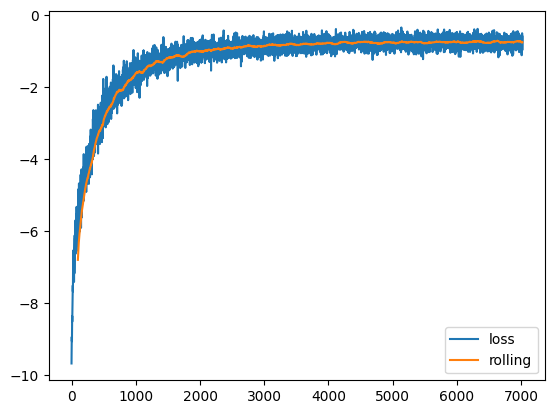

In [33]:
# loss_files = data_ops.gather_files(loss_dir)
# Read in all the loss files
loss_dfs = [pd.read_csv(f, header=None) for f in loss_files]
loss_df = pd.concat(loss_dfs, ignore_index=True)
loss_df.columns = ['batch','loss']
del loss_df['batch']
# loss_df.set_index('batch', inplace=True)
# sort on index
# loss_df.sort_index(inplace=True)
loss_df=loss_df*-1
# Rolling average
loss_df['rolling'] = loss_df['loss'].rolling(window=rolling_window).mean()
loss_df.plot()

<Axes: >

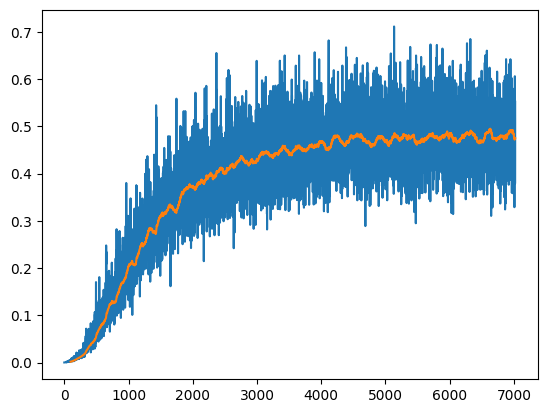

In [34]:
# convert log probs to probs
loss = loss_df['loss'].apply(lambda x: math.exp(x))
rolling = loss.rolling(window=rolling_window).mean()
loss.plot()
rolling.plot()

# print(rolling[10001])
# print(rolling[len(rolling)/2])
# print(rolling[-1:])
